<a href="https://colab.research.google.com/github/gapself/machine-learning-projects/blob/main/neural_network_topology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science z Python 3.10. Topologia sieci neuronowych
## 🇬🇧 Data Science with Python 3.10. Topology of a Neural Network
#### 👨‍🏫 PhD, M.Sc. Psych., M.Sc. IT, Wojciech Oronowicz-Jaśkowiak
#### 🤖 https://github.com/aipogodzinach

### 1. Import bibliotek

In [ ]:
!pip install mnist

import numpy as np
import math
import mnist
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

# zaimportujemy biblioteki, które pozwolą nam na pracę podczas tego ćwiczenia
# musimy doinstalować tylko jedną z nich (mnist), która zawiera materiał treningowy oraz testowy

### 2. Funkcje aktywacji

W trakcie wykładu omawiane były funkcje aktywacji. Funkcje te cechują się różnymi właściwościami, które sprawiają, że mogą być one przydatne w zadaniach klasyfikacji do jednej z dwóch klas lub do ich większej ilości (np. softmax). Zanim zaczniemy nasze podstawowe zadanie napisz pozostałe funkcje aktywacji, korzystając z podanego szablonu.

Na tym etapie tworzymy nowe zmienne, które będą odnosiły się do wartości wyjściowych pewnej sieci neuronowej.

In [ ]:
x = np.array([1.3, 0.32, 0.21]) # wyjścia dla softmax
y = 2 # wyjście dla sigmoid
a = -9 # wyjście dla relu
z = 4 # wyjście dla tangensa hiperbolicznego

Stworzymy teraz prostą implementację funkcji softmax przyjmującą x.

In [ ]:
def softmax(x):
    return np.exp(x) / sum(np.exp(x))
print(softmax(x))

[0.58427337 0.21928428 0.19644234]



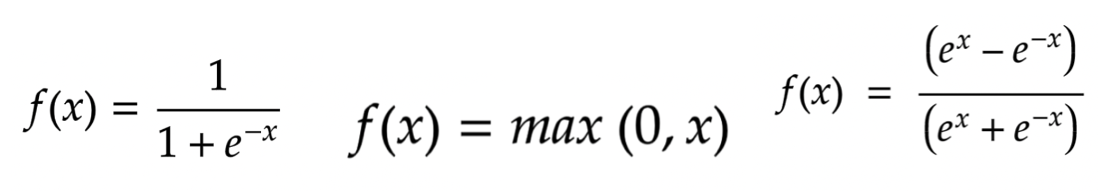

In [ ]:
def sigmoid(y):
   return 1 / (1 + np.exp(-y))
  # 🐞 w tym miejscu dokończ implementację funkcji sigmoidalnej przyjmującej y
print(sigmoid(y))

0.8807970779778823


In [ ]:
def relu(a):
  return np.maximum(0,a)
    # 🐞 w tym miejscu dokończ implementację funkcji relu przyjmującej a
print(relu(a))

0


In [ ]:
def tanh(z):
  return math.tanh(z)
    # 🐞 w tym miejscu dokończ implementację funkcji tangensa hiperbolicznego przyjmującej z
print(tanh(z))

0.999329299739067


### 3. Tworzenie sieci neuronowej

#### 3.1. Przygotowanie danych treningowych i testowych

Zacznim przejdziemy do trenowania sieci neuronowej musimy najpierw rozwiązać kilka problemów. Pierwszym z nich jest stworzenie odpowiednich zmiennych odnoszących się do danych treningowych oraz danych testowych.

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
# 🐞 w tym miejscu dopisz trzy kolejne linie kodu, ale odnoszące się do labels (etykiet) oraz danych testowych (a nie treningowych)

Zanim przejdziemy dalej możemy podejrzeć nasze dane. Zastanówmy się do czego odnoszą się liczby 60000 oraz 28?

In [ ]:
print(train_images.shape) #(60000, 28, 28) - 60tys danych trening. o rozm.28x28px
print(train_labels.shape) 
print(test_images.shape)
# 🐞 w tym miejscu dopisz trzy kolejne linie kodu, ale odnoszące się do kształtu etykiet oraz danych testowych

(60000, 28, 28)
(60000,)
(10000, 28, 28)


#### 3.2. Normalizacja i "spłaszczenie" danych

Na tym etapie powinniśmy mieć stworzone cztery zmienne odnoszące się do materiału treningowego oraz etykiet (osobno dla zbioru treningowego i testowego). Zanim przejdziemy dalej musimy zadać jeszcze o normalizację. Co właściwie zamierzamy zrobić z naszymi danymi? Chcemy sprowadzić wartości pikseli z zakresu od 0-255 do nowego zakresu -0.5-0.5. Dlaczego to robimy?

In [ ]:
train_images = (train_images / 255) - 0.5 #255, bo rgb
test_images = (test_images / 255) - 0.5

Możemy jeszcze raz podejrzeć nasze dane, ale na tym etapie jeszcze nic się nie zmieniło.

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Teraz dokonujemy "spłaszczenia" (flatten) naszych danych. Skąd się bierze wartość 784? (to po prostu 28*28 = 784). Każdy obraz w danych treningowych MNIST ma wymiary 28 x 28 (oraz informację odnoszącą się do skali szarości). Spłaszczymy każdy obraz 28x28 do 784-wymiarowego wektora, którego użyjemy jako danych wejściowych do naszej sieci neuronowej.

In [ ]:
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

Teraz widzimy, że kształt naszych danych zmienił.

In [ ]:
print(train_images.shape) #macierz 3wymiarowa (60000, 28, 28) została zamieniona na .. listę

(60000, 784)


#### 3.3. Przygotowanie architektury sieci neuronowej

Mamy już przygotowane dane, dokonaliśmy ich normalizacji oraz przeprowadziliśmy "spłaszczenie". Przechodzimy w końcu do etapu tworzenia architektury naszej sieci neuronowej. Wykorzystamy w tym celu klasę Sequential. Mamy do wyboru teraz kilka możliwości, które zależą od danych, które chcemy analizować. 

*   Zważywszy na to, że chcemy przeprowadzić "prostą" klasyfikację danych MNIST (jeszcze bez wykorzystania CNN) stworzymy sieć neuronową, która będzie składała się z warstw gęstych (Dense), w których każdy neuron będzie połączony z innym neuronem. 
*   Musimy tylko ustalić liczbę nodes oraz odpowiednią funkcję aktywacji.
*   Wskazujemy również odpowiednią wartość wejściową (input_shape).
*   Ostatnia wartość nodes odnosi się do ilości klas, ale jak ustalić wartość nodes w poprzednich warstwach?


In [ ]:
model_1 = Sequential([
  #wejściowa
  Dense(256, activation='relu', input_shape=(784,)),  #256 wartości wyjściowych = (256 neuronów) + w 1.wszej warstwie sieci musimy podać rozmiar wejścia, a kolejne warstwy potem mają automatyczne dobrany wymiar na podstawie tej pierwszej 
  # ukryta
  Dense(128, activation='relu'),
  # wyjściowa, mamy 10 klas do zaklasyfikowania od 0-9, które chcemy klasyfikować więc wybieramy softmax, ale np. sigmoid dla 2 klas.
  Dense(10, activation='softmax'),
])
#256,128,10 - nodes / węzły w sieci - 256, bo to czysto uznaniowe, dowolne wartości możemy wpisywać:
# pierwsza wartość node powinna być większa od kolejnej
# jeśli mamy 10 cyfr, to w warstwie wyjściowej wpisujemy 10 :)

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


#### 3.4. Optymalizator, funkcja straty i metryki

W tym miejscu dokonujemy wyboru odpowiedniego optymalizatora, dobieramy funkcję straty oraz wskazujemy metryki, które wykorzystamy do oceny przydatności naszego modelu. Zagadnienia te zostaną poruszone na następnym wykładzie. 

In [ ]:
model_1.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#### 3.5. Trenowanie sieci neuronowej

W końcu przechodzimy do etapu trenowania przygotowanej przez nas architektury sieci neuronowej. Musimy jeszcze określić liczbę epok ("cykli trenowania sieci") oraz batch size. Pod koniec uzyskujemy informacje dotyczące straty walidacji oraz dokładności klasyfikacji.

In [ ]:
model_1.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5, #epoch = cykl trenowania sieci, sieć 5 krotnie zobaczy nasze dane treningowe, im więcej to teoretycznie lepiej, ale trzeba uważać by nie przetrenować sieci
  batch_size=30, #(też ebs?) - jak dużo danych treningowych chcemy pokazać sieci za jednym zamachem, im wyższy to możliwe, że sieć szybciej się wyuczy, ale komp działa wolniej
)

Epoch 1/5
2000/2000 [==============================] - 11s 4ms/step - loss: 0.2864 - accuracy: 0.9124
Epoch 2/5
2000/2000 [==============================] - 7s 3ms/step - loss: 0.1377 - accuracy: 0.9565
Epoch 3/5
2000/2000 [==============================] - 7s 3ms/step - loss: 0.1078 - accuracy: 0.9662
Epoch 4/5
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0898 - accuracy: 0.9714
Epoch 5/5
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0748 - accuracy: 0.9760


### 4. Zadania do wykonania

##### 4.1. Zadanie 1.
Poszukaj informacji dotyczącej możliwości wygenerowania grafiki prezentującej architekturę sieci neuronowej i wstaw ją poniżej (z użytym kodem). Wykorzystaj architekturę sieci wykorzystaną na zajęciach.

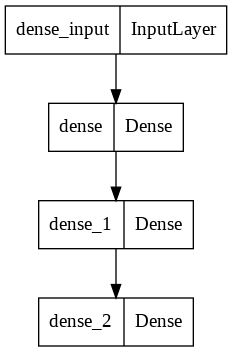

In [ ]:
tf.keras.utils.plot_model(
    model_1,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

##### 4.2. Zadanie 2.
Załaduj ponownie model, dokonaj modyfikacji parametrów odnoszących się do procesu trenowania sieci neuronowej pokazywanej w czasie zajęć. Podnieś liczbę epok do 100. Po jakim czasie obserwujesz okres stabilizacji dokładności klasyfikacji lub spadku jej wartości? Jak zachowuje się wartość validation loss?


---


> *Dopiero przy 39 cyklu loss utrzymuje wartość równą ~ 0.01. Z kolei od 17-stego cyklu parametr accuracy nie spada poniżej 0.99.*


In [ ]:
model_2 = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),  
  Dense(128, activation='relu'),
  Dense(10, activation='softmax'),
])

model_2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model_2.fit(
  train_images,
  to_categorical(train_labels),
  epochs=100,
  batch_size=30,
)

Epoch 1/100
2000/2000 [==============================] - 8s 4ms/step - loss: 0.2846 - accuracy: 0.9120
Epoch 2/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.1381 - accuracy: 0.9569
Epoch 3/100
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1077 - accuracy: 0.9668
Epoch 4/100
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0872 - accuracy: 0.9726
Epoch 5/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0772 - accuracy: 0.9753
Epoch 6/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0668 - accuracy: 0.9786
Epoch 7/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0603 - accuracy: 0.9809
Epoch 8/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0524 - accuracy: 0.9826
Epoch 9/100
2000/2000 [==============================] - 7s 3ms/step - loss: 0.0489 - accuracy: 0.9837
Epoch 10/100
2000/2000 [==============================] - 7s 3ms/step - l

##### 4.3. Zadanie 3.
Załaduj ponownie model, dokonaj modyfikacji parametrów odnoszących się do procesu trenowania sieci neuronowej pokazywanej w czasie zajęć. Pozostaw liczbę epok, ale zmodyfikuj wartość batch size określając ją na 20. Czy wpłynęło to na parametry końcowe modelu, czy nie miało związku?


---


> *Zmieniając batch_size z 30 na 20 - sieć neuruonowa uczyła się wolniej, natomiast accuracy dla model_3 w 5-tym cyklu w pierwszym przypadku odtworzenia kodu nieznacznie zmalało (ok ~0.01), za drugim razem accuracy wzrosło (ok ~0.01).*


In [ ]:
model_3 = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),  
  Dense(128, activation='relu'),
  Dense(10, activation='softmax'),
])

model_3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model_3.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=20,
)

Epoch 1/5
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0690 - accuracy: 0.9782
Epoch 2/5
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0624 - accuracy: 0.9795
Epoch 3/5
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0573 - accuracy: 0.9820
Epoch 4/5
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0499 - accuracy: 0.9842
Epoch 5/5
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0470 - accuracy: 0.9847


##### 4.4. Zadanie 4.
Zaproponuj inną architekturę sieci neuronowej. Zmień ilość warstw, zmodyfikuj ilość węzłów. Dodaj nowy typ warstwy Dropout (zob. więcej w tym miejscu - https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/). Czy udało Ci się osiągnąć lepsze parametry modelu?


---


> *W pierwszej warstwie (wejściowej) zmodyfikowałam liczbę węzłów z 256 na 128. Zastosowałam Dropout 20% na warstwach ukrytych, w tym przed warstwą wyjściową. Dodałam drugą warstwę ukrytą z 32 węzłami. Porównując model_another do model_1 nie uzyskałam lepszych parametrów (wręcz gorsze): accuracy dla model_another zmniejszyło się o ok ~0.03.*


In [ ]:
model_another = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dropout(0.2),
  Dense(64, activation='relu'), 
  Dropout(0.2),
  Dense(32, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax'),
])

model_another.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_another.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 10)               

In [ ]:
model_another.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=30,
)

Epoch 1/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.6042 - accuracy: 0.8133
Epoch 2/5
2000/2000 [==============================] - 7s 4ms/step - loss: 0.3264 - accuracy: 0.9072
Epoch 3/5
2000/2000 [==============================] - 7s 4ms/step - loss: 0.2839 - accuracy: 0.9207
Epoch 4/5
2000/2000 [==============================] - 7s 4ms/step - loss: 0.2484 - accuracy: 0.9293
Epoch 5/5
2000/2000 [==============================] - 7s 4ms/step - loss: 0.2276 - accuracy: 0.9352



##### 4.5. Zadanie 5.
Odtwórz dwie wyświetlone poniżej architektury sieci neuronowych (model_x) oraz (model_y). Określ funkcję aktywacji jako linear (również dla wyjścia sieci) i przeprowadź uczenie przy liczbie epok wynoszącej 10. Jak opisałbyś przebieg uczenia się? Dlaczego sieci neuronowe, pomimo ich zróżnicowania, zachowują się podobnie podczas trenowania i ich parametry (dokładność klasyfikacji, val loss) są takie same niezależnie od epoki?


---


> *Po pierwsze, wykonując problem z klasyfikacją binarną, należy ustawić aktywację ostatniej warstwy na softmax. Z wykładu:* "*Neurony w warstwie ukrytej mają taką samą funkcję aktywacji, natomiast w warstwie wyjściowej jest ona inna*", *co oznacza, że  nie możemy ustawić linear, bo nie przyniesie to oczekiwanych rezultatów.*


> *Dla modelu_x accuracy utrzymuje się na niskim poziomie ~ 0.0993. Nieco lepszy wynik osiąga model_y, możliwe, że jest to spowodowane mniejszą liczbą warstw modelu sieci neuronowej.*





In [ ]:
model_x = Sequential([
  Dense(256, activation='linear', input_shape=(784,)),
  Dense(256, activation='linear'),
  Dense(256, activation='linear'),
  Dense(128, activation='linear'),
  Dense(128, activation='linear'),
  Dense(128, activation='linear'),
  Dense(64, activation='linear'),
  Dense(64, activation='linear'),
  Dense(64, activation='linear'),
  Dense(10, activation='linear'),
])

model_x.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_x.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=30,
)

Epoch 1/10
2000/2000 [==============================] - 10s 4ms/step - loss: 11.2171 - accuracy: 0.0994
Epoch 2/10
2000/2000 [==============================] - 9s 4ms/step - loss: 11.4143 - accuracy: 0.0993
Epoch 3/10
2000/2000 [==============================] - 9s 4ms/step - loss: 11.4143 - accuracy: 0.0993
Epoch 4/10
2000/2000 [==============================] - 9s 4ms/step - loss: 11.4143 - accuracy: 0.0993
Epoch 5/10
2000/2000 [==============================] - 9s 4ms/step - loss: 11.4143 - accuracy: 0.0993
Epoch 6/10
2000/2000 [==============================] - 9s 4ms/step - loss: 11.4143 - accuracy: 0.0993
Epoch 7/10
2000/2000 [==============================] - 9s 4ms/step - loss: 11.4143 - accuracy: 0.0993
Epoch 8/10
2000/2000 [==============================] - 9s 4ms/step - loss: 11.4143 - accuracy: 0.0993
Epoch 9/10
2000/2000 [==============================] - 9s 4ms/step - loss: 11.4143 - accuracy: 0.0993
Epoch 10/10
2000/2000 [==============================] - 9s 4ms/step - l

In [ ]:
print(model_x.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 256)               200960    
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dense_15 (Dense)            (None, 256)               65792     
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dense_19 (Dense)            (None, 64)               

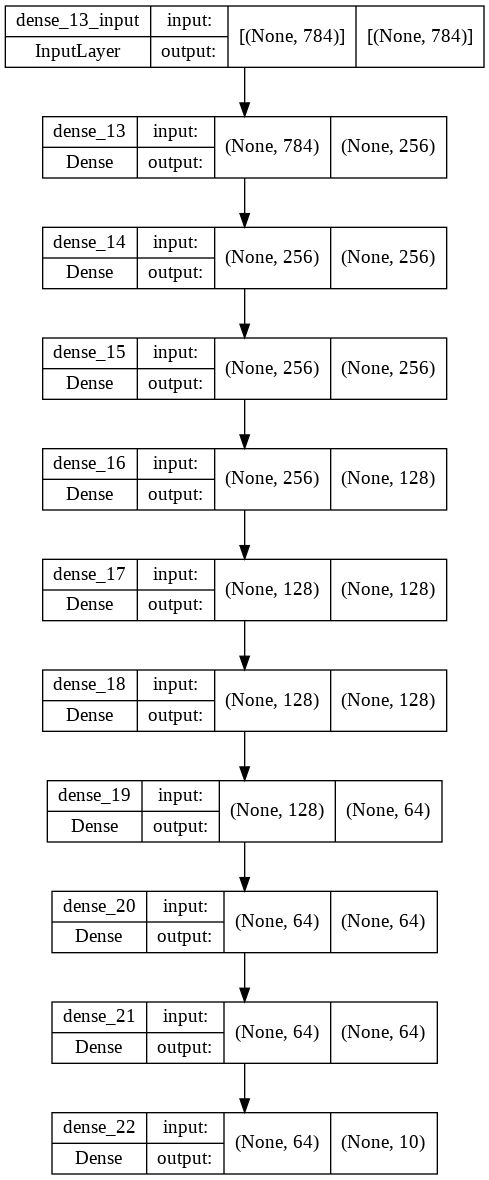

In [ ]:
plot_model(model_x, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_y = Sequential([
  Dense(256, activation='linear', input_shape=(784,)),
  Dense(128, activation='linear'),
  Dense(64, activation='linear'),
  Dense(10, activation='linear'),
])

model_y.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_y.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=30,
)

Epoch 1/10
2000/2000 [==============================] - 7s 3ms/step - loss: 7.6236 - accuracy: 0.1071
Epoch 2/10
2000/2000 [==============================] - 6s 3ms/step - loss: 8.0746 - accuracy: 0.1023
Epoch 3/10
2000/2000 [==============================] - 6s 3ms/step - loss: 8.0746 - accuracy: 0.1023
Epoch 4/10
2000/2000 [==============================] - 6s 3ms/step - loss: 8.0746 - accuracy: 0.1023
Epoch 5/10
2000/2000 [==============================] - 6s 3ms/step - loss: 8.0746 - accuracy: 0.1023
Epoch 6/10
2000/2000 [==============================] - 6s 3ms/step - loss: 8.0746 - accuracy: 0.1023
Epoch 7/10
2000/2000 [==============================] - 6s 3ms/step - loss: 8.0746 - accuracy: 0.1023
Epoch 8/10
2000/2000 [==============================] - 6s 3ms/step - loss: 8.0746 - accuracy: 0.1023
Epoch 9/10
2000/2000 [==============================] - 7s 3ms/step - loss: 8.0746 - accuracy: 0.1023
Epoch 10/10
2000/2000 [==============================] - 6s 3ms/step - loss: 8.074

In [ ]:
print(model_y.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 256)               200960    
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


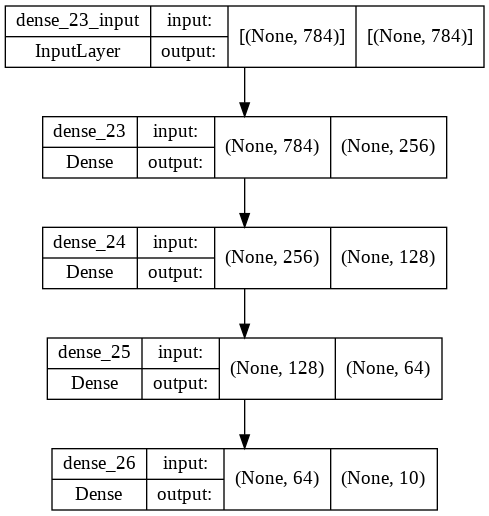

In [ ]:
plot_model(model_y, to_file='model_plot.png', show_shapes=True, show_layer_names=True)